This notebook will try to re-run the code from the PUNS demo to test the package interfaces


In [18]:
from puns.ControlMDP import SyntheticMDP
from puns.SpecificationFSMTools import SpecificationFSM
from puns.Exploration import ExplorerAgent
from puns.utils import CreateSampleMDP, Globally, Eventually, Order, RecordLearningCurve
from puns.SpecificationMDP import SpecificationMDP
from puns.LearningAgents import QLearningAgent
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20,20]

{('["G", ["not", ["T0"]]]',): 2,
 ('["and", ["G", ["not", ["T0"]]], ["F", ["W0"]], ["F", ["W2"]], ["F", ["W1"]], ["U", ["not", ["W2"]], ["W0"]]]',): 0,
 ('["and", ["G", ["not", ["T0"]]], ["F", ["W0"]], ["F", ["W2"]], ["U", ["not", ["W2"]], ["W0"]]]',): 6,
 ('["and", ["G", ["not", ["T0"]]], ["F", ["W1"]]]',): 4,
 ('["and", ["G", ["not", ["T0"]]], ["F", ["W2"]], ["F", ["W1"]]]',): 5,
 ('["and", ["G", ["not", ["T0"]]], ["F", ["W2"]]]',): 3,
 ('[false]',): 1}

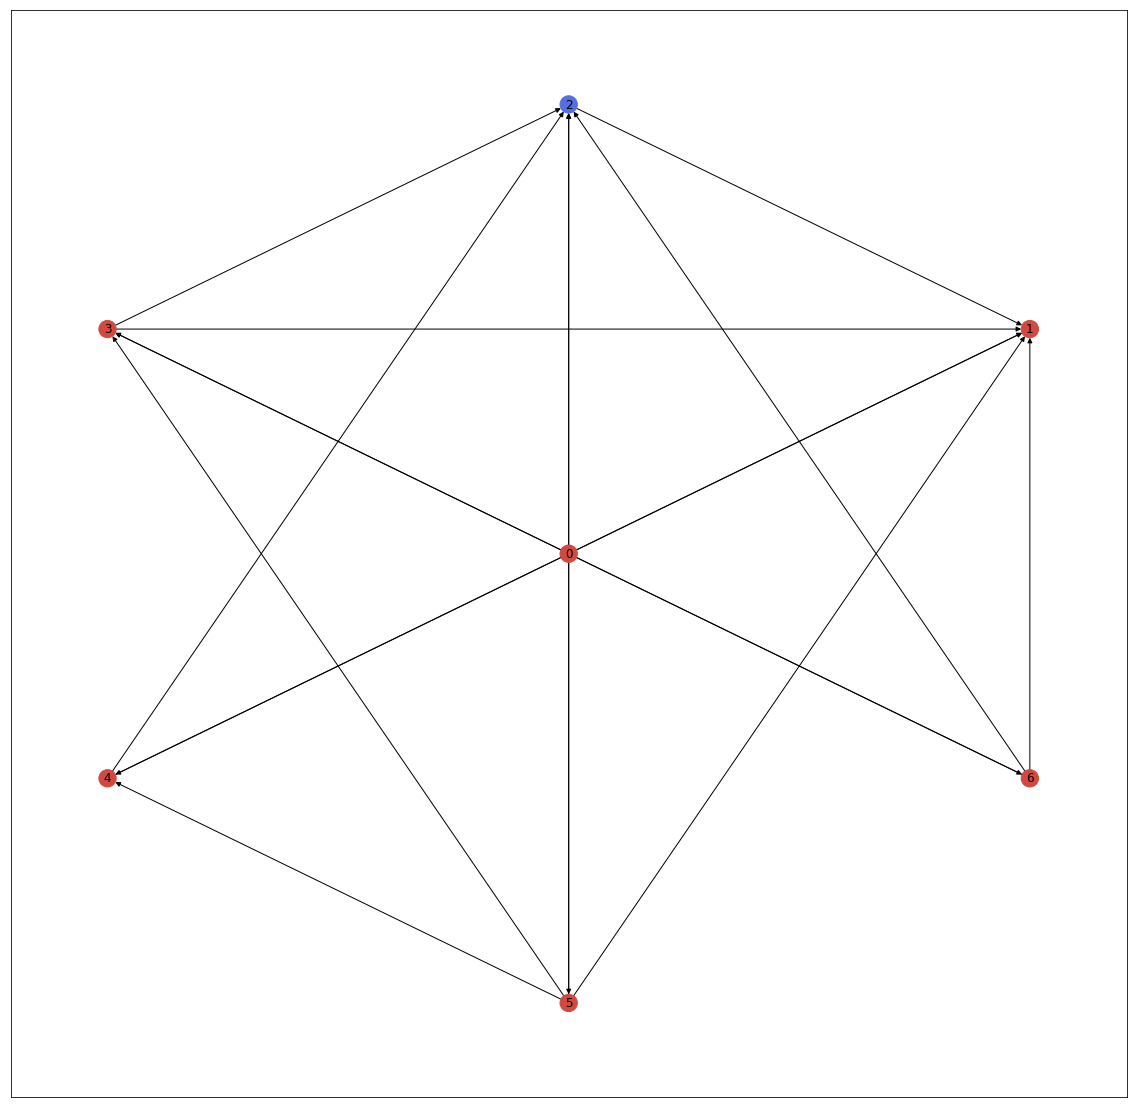

In [33]:
formulas = []
formulas.append(['and', Globally('T0'), Eventually('W0'), Eventually('W2'), Eventually('W1'), Order('W0','W2')])
probs = [1]

specification_fsm = SpecificationFSM(formulas, probs)
specification_fsm.visualize()
specification_fsm.states2id

In [34]:
env_mdp = SyntheticMDP(n_threats = 2, n_waypoints = 4)

In [35]:
MDP = SpecificationMDP(specification_fsm, env_mdp)
q_agent = QLearningAgent(MDP)

In [36]:
q_agent.explore(episode_limit = 10000)

(10000, 2406)

In [37]:
eval_agent = ExplorerAgent(MDP, input_policy=  q_agent.create_learned_softmax_policy(0.01))

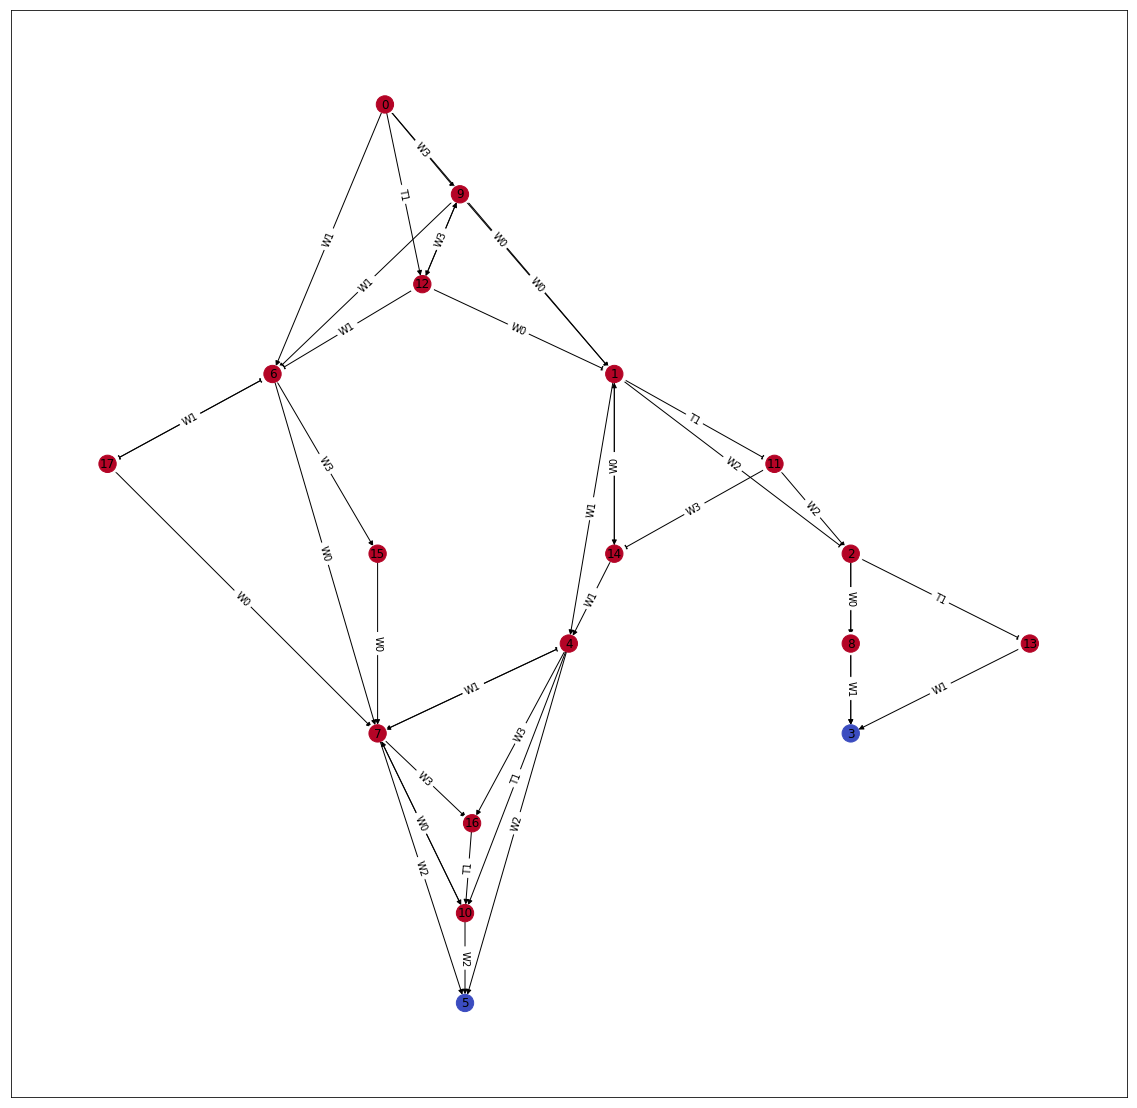

In [38]:
eval_agent.explore(episode_limit=1000)
col = eval_agent.visualize_exploration()